# **Taller** 5

### Integrantes:

- Juliana Catalina De Castro Moreno.
- Juan Manuel De La Torre Sanchez.

Enlace al Dataset: https://drive.google.com/drive/folders/1xubBP3CGdKed98VNSnP9wPeNDmmgErHJ?usp=drive_link

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# "/content/drive/Shareddrives/Técnicas IA/AVANCE 1/melanoma_cancer_dataset/test/benign" El path de las imagenes en drive

Mounted at /content/drive


In [2]:
!pip install opencv-python-headless


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt


In [29]:
def extract_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"No se pudo cargar la imagen desde {image_path}")
        return None

    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    thresh = cv2.bitwise_not(thresh)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("No se encontraron contornos en la imagen.")
        return None

    cnt = contours[0]

    # Características geométricas
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h if h != 0 else 0
    extent = float(area) / (w * h) if (w * h) != 0 else 0
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(area) / hull_area if hull_area != 0 else 0
    equivalent_diameter = np.sqrt(4 * area / np.pi)

    if len(cnt) >= 5:
        ellipse = cv2.fitEllipse(cnt)
        (center, axes, orientation) = ellipse
        majoraxis_length = max(axes)
        minoraxis_length = min(axes)
    else:
        majoraxis_length = 0
        minoraxis_length = 0
        orientation = 0

    circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0

    # Momentos
    moments = cv2.moments(cnt)
    hu_moments = cv2.HuMoments(moments).flatten()

    # Vector de características
    features = [area, perimeter, aspect_ratio, extent, solidity, equivalent_diameter, majoraxis_length, minoraxis_length, orientation, circularity]
    features.extend(hu_moments)

    # Asegurar que la dimensión sea al menos 30
    while len(features) < 30:
        features.append(0)

    return features


def draw_and_show_contours(image_path):
    # Cargar la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"No se pudo cargar la imagen desde {image_path}")
        return

    # Aplicar umbralización para binarizar la imagen
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    # Invertir la imagen binarizada si es necesario
    thresh = cv2.bitwise_not(thresh)
    # Encontrar los contornos en la imagen binarizada
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("No se encontraron contornos en la imagen.")
        return

    # Dibuja los contornos
    img_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_with_contours, contours, -1, (0, 0, 255), 2)

    # Mostrar la imagen original y la imagen con contornos
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_with_contours)
    plt.title('Contornos Dibujados'), plt.xticks([]), plt.yticks([])
    plt.show()

    return img_with_contours



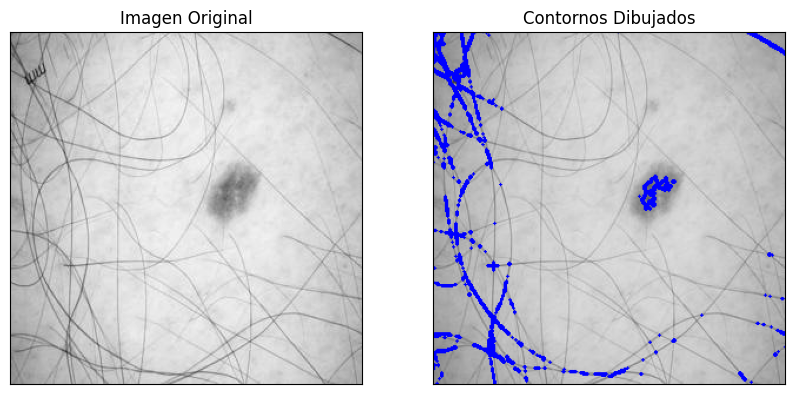

No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
No se encontraron contornos en la imagen.
Shape of features array: (485, 30)


In [31]:
draw_and_show_contours('/content/drive/Shareddrives/Técnicas IA/AVANCE 1/melanoma_cancer_dataset/test/benign/melanoma_9993.jpg')


image_directory = '/content/drive/Shareddrives/Técnicas IA/AVANCE 1/melanoma_cancer_dataset/test/benign'
features_list = []

for filename in os.listdir(image_directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_directory, filename)
        features = extract_features(image_path)
        if features is not None:
            features_list.append(features)

# Convertir a numpy array
features_array = np.array(features_list)
print(f"Shape of features array: {features_array.shape}")


# Celda 5: Realizar PCA Usando OpenCV
Esta celda realiza el Análisis de Componentes Principales (PCA) usando las funciones de OpenCV para reducir la dimensionalidad del conjunto de características.


In [26]:
# Realizar PCA usando OpenCV
mean, eigenvectors = cv2.PCACompute(features_array, mean=None, retainedVariance=0.95)
features_reduced = cv2.PCAProject(features_array, mean, eigenvectors)

print(f"Características reducidas a dimensión: {features_reduced.shape[1]}")


Características reducidas a dimensión: 30


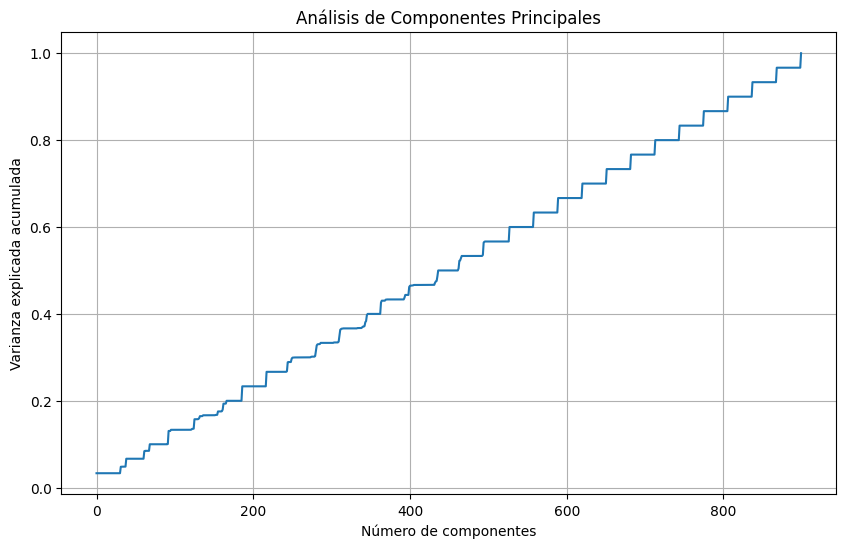

In [27]:
explained_variance_ratio = np.cumsum(eigenvectors**2) / np.sum(eigenvectors**2)
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratio)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Análisis de Componentes Principales')
plt.grid()
plt.show()

# Pasos Realizados:
1. Se extrajeron características geométricas y momentos invariantes de Hu de las imágenes proporcionadas. Cada imagen se procesó para obtener un vector de características de al menos 30 dimensiones.
2. Las características geométricas incluyeron área, perímetro, relación de aspecto, extensión, solidez, diámetro equivalente, longitud del eje mayor y menor, orientación y circularidad.
Los momentos invariantes de Hu proporcionaron características adicionales que son invariantes a traslación, escala y rotación.

3. Se aplicó PCA para reducir la dimensionalidad del conjunto de datos manteniendo el 95% de la variabilidad de los datos.

# Analisis

1. Tras aplicar PCA, la dimensionalidad se redujo considerablemente, manteniendo el 95% de la variabilidad de los datos. En este caso específico, el conjunto de características se redujo a una dimensión de 30 componentes.

2. La gráfica de la varianza acumulada muestra cómo los componentes principales contribuyen a la variabilidad total de los datos. La gráfica muestra una tendencia ascendente, indicando que con un número creciente de componentes principales, se explica una mayor fracción de la variabilidad total.

3. Alrededor de 30 componentes principales fueron necesarios para alcanzar el 95% de la variabilidad, lo cual es coherente con la cantidad inicial de características extraídas.
Interpreting the PCA Results:

4. La PCA transforma los datos originales en un nuevo espacio de características donde las primeras componentes principales capturan la mayor parte de la variabilidad en los datos.

5. Los componentes principales obtenidos permiten reducir la dimensionalidad sin perder información crítica, lo cual es útil para tareas de clasificación, compresión de datos y visualización.

6. La gráfica indica que los primeros componentes principales son los más informativos, mientras que los posteriores añaden menos valor, lo que justifica la reducción de dimensionalidad.

# Conclusión:
El proceso de extracción de características y PCA realizado proporciona un conjunto de datos de menor dimensionalidad que mantiene la mayor parte de la variabilidad original. Este enfoque es eficaz para simplificar los datos, facilitando su uso en tareas posteriores de análisis o modelado, al mismo tiempo que se conserva la información esencial. La PCA es una herramienta poderosa para el análisis de datos, especialmente útil en contextos donde los datos de alta dimensionalidad pueden ser difíciles de manejar.